# Topic Modeling


## 1 - Library Imports

In [110]:
# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text
import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable =['parser', 'ner'])
import re, numpy as np, pandas as pd
from pprint import pprint

#importing gensim and related libraries
import gensim
import gensim, spacy, logging, warnings
from gensim import corpora, models, similarities
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

#importing matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib notebook

# importing nltk and related libraries
import nltk as nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
from nltk.stem.wordnet import WordNetLemmatizer
import string

# other imports
import warnings
import pandas as pd
import pickle
from importlib import reload
warnings.filterwarnings("ignore", category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

## 2 - Data Preprocessing

In [34]:
#import dataset
reload(corpus)

<module 'libraries.corpus' from 'C:\\Users\\sj\\Documents\\GitHub\\datascience_project\\libraries\\corpus.py'>

In [35]:
#Retrieving the PDF files from white-paper folder and converting them to text
dataset = pdf2text.get_dataset()

In [37]:
dataset.keys()

dict_keys(['#metahash', '0x', 'abbccoin', 'aion', 'apollocurrency', 'ardor', 'ark', 'basicattentiontoken', 'bhpcoin', 'binancecoin', 'bitcoin', 'bitcoingold', 'bitshares', 'bittorrent', 'bytecoin', 'bytom', 'celernetwork', 'chainlink', 'cosmocoin', 'cosmos', 'crypto', 'cryptonex', 'dai', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'elastos', 'enjincoin', 'eos', 'ethereum', 'ethereumclassic', 'factom', 'fantom', 'gnosis', 'golem', 'gxchain', 'holo', 'horizen', 'hypercash', 'hyperion', 'icon', 'iexecrlc', 'inocoin', 'iota', 'japancontenttoken', 'komodo', 'latoken', 'lina', 'loopring', 'maidsafecoin', 'maker', 'metal', 'metaverseetp', 'mixin', 'monero', 'nano', 'nebulas', 'nem', 'nexo', 'nkn', 'obyte', 'omisego', 'ontology', 'orbs', 'particl', 'paxosstandardtoken', 'powerledger', 'pundix', 'ravencoin', 'riftoken', 'siacoin', 'singularitynet', 'skycoin', 'solve', 'status', 'steem', 'stellar', 'stratis', 'synthetixnetworktoken', 'tenx', 'tether', 'tezos', 'theta', 'thetafuel', '

In [38]:
#corpora segregated in terms of sentences 
corpora = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True, makeSentences=True, removeURL=True, removeChar= True, stops=['\u200b'] )

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: #metahash
Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: met

In [39]:
#Corpora not segregated with sentences
corpora_whole = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True, makeSentences= False, removeURL=True, removeChar= True, stops=['\u200b'] )

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: #metahash
Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: met

In [41]:
# Add ALL the documents into one single array
final = []
for k in corpora.keys():
    for i in corpora[k]:
        final += [i]
len(final)

42688

In [45]:
#Our dictionary at the moment is in key: blockchain firms, value: list of text of whitepapers
#We change this to key: blockchain firms and value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [46]:
#Combining then
data_combined = {key:[combine_text(value)] for (key, value) in corpora.items()}

In [47]:
#Putting the text into pandas dataframe
import pandas as pd
pd.set_option('max_colwidth', 150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['whitepapers']
data_df = data_df.sort_index()

In [48]:
#Glancing into the dataframe; it is a dataframe with each row representing a document (blockchain whitepaper)
data_df.head(2)

,whitepapers
#metahash,yellow paper technical documentation version gartenstrasse yellow paper project goal technical feature test methodology test building nerk test ...
0x,open protocol decentralize exchange blockchain projectcom protocol facilitates low friction peertopeer exchange erc token blockchain protocol int...


In [49]:
#Pickling the data for future use. 
data_df.to_pickle('tmcorpus.pkl')

In [50]:
with open('tmcorpus.pkl', 'rb') as f:
    data_df = pickle.load(f)

## 3 - Topic Modeling on Blockchain Whitepapers

At the document level, a useful ways to understand the text is by analysing its topics. Topic Modelling is the process of learning, recognising and extracting the topics across a collection of documents. This notebook tries to uncover topics from blockchain whitepapers that is relevant to Schungrat in-terms of investment dimensions.

The notebook explores some of the methods of Topic Modelling such as ***Non-negative Matrix Factorization*** & ***Latent Dirichlet Allocation*** to see which fits better. Rather than being conceptual or mathematical, this notebook offers an applied approach with comments for the codes.


Since the goal of this notebook is Topic Modelling, the text must be tokenized which means broken down to small pieces which here is words. We use scikit-learn's CountVectorizer technique where every row represents a different document and every column will represent a different word. 

At this moment, stop words are also removed thanks to CountVectorizer. Stop words are common words that seldom adds meaning or value to the text. 


In [51]:
#Creating a document-term matrix using CountVectorizer, and removing common english stop words. 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words ='english')
data_cv = cv.fit_transform(data_df.whitepapers)
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_dtm.index = data_df.index
vocab = cv.get_feature_names()

In [52]:
#we also make another document term matrix with tf-idfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
data_tv = tv.fit_transform(data_df.whitepapers)
data_dtm_tfidf = pd.DataFrame(data_tv.toarray(), columns = tv.get_feature_names())
data_dtm_tfidf.index = data_df.index

In [53]:
#pickling the document-term matrix both countvectorizer and tfidfvectorizer
data_dtm.to_pickle('dtm.pkl')
data_dtm_tfidf.to_pickle('dtm_tfidf.pkl')


In [54]:
#Trying LDA and NMF from scikit-learn
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 5
#Run NMF

nmf =  NMF(n_components = no_topics, random_state = 1, alpha = .00001, l1_ratio = .5, init='nndsvd').fit(data_dtm_tfidf)
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(data_dtm)


In [55]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = cv.get_feature_names()
    
    word_dict = {};
    for i in range(no_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-10 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [56]:
#getting the topics from the first iteration with NMF
get_nmf_topics(nmf, 5)


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,databased,nomic,assetissuefee,tokens,signups
1,blockchainbacked,blockchainagnostic,tokens,plead,keyvalue
2,severance,transferamount,contractstoragea,uservisible,transferamount
3,applicationlevel,nest,digitization,markup,blockchainagnostic
4,temperature,consensys,transferamount,paytopublickey,overcentralized
5,deviation,chainlink,blockchainbacked,exchangesthat,riskfree
6,uservisible,account,smoothly,cryptoeconomy,publisher
7,communityoriented,statista,chainlink,feegenerating,timescale
8,nest,blockchainbacked,startup,wary,address
9,busy,guild,cryptoboxseal,cardwallet,uservisible


In [57]:
#display topics from lda(scikit-learn)

topic_words = {}

for topic, comp in enumerate(lda.components_):   
    word_idx = np.argsort(comp)[::-1][:no_topics]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]

In [58]:
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  transaction, node, nerk, token, block
Topic: 1
  transaction, node, nerk, token, block
Topic: 2
  node, set, event, block, layer
Topic: 3
  user, data, platform, token, blockchain
Topic: 4
  transaction, chain, nerk, node, blockchain


In [59]:
#importing necessary modules for LDA with gensim

from gensim import matutils, models
import scipy.sparse
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

In [60]:
#importing the term-document matrix and converting it into document-term matrix with transpose

tdm = data_dtm.transpose()
tdm.head(2)

,#metahash,0x,abbccoin,aion,apollocurrency,ardor,ark,basicattentiontoken,bhpcoin,binancecoin,...,usdcoin,utrust,vechain,waltonchain,wanchain,waves,wax,xrp,zcash,zilliqa
aack,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aacks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Converting the term-document matrix into gensim corpus format which follows a sequence from dataframe to sparse matrix to gensim corpus
sparse_docs = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_docs)

In [62]:
#Creating term dictionary of our corpus, where every unique term is assigned an index
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [63]:
print(id2word[20])

abbreviate


In [64]:
#lda with countvectorizer
lda_gensim = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=21,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


In [65]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 10);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [66]:
get_lda_topics(lda_gensim, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,data,nerk,transaction,node,token
1,nerk,transaction,block,block,user
2,user,user,node,key,blockchain
3,chain,order,nerk,transaction,asset
4,blockchain,unit,blockchain,set,market
5,platform,token,consensus,note,platform
6,service,contract,key,consensus,service
7,transaction,payment,account,protocol,data
8,node,state,signature,bit,technology
9,process,data,time,hash,provide


As expected, most of the important topics seem to be around blockchain, transactions, token, protocol etc.

### Adding stopwords; Filtering papers by nouns

In [67]:
#Adding obvious words such as tokens, blockchain, node, transaction etc into stopwords 
from sklearn.feature_extraction import text
add_stop_words = ['tokens', 'token', 'blockchain', 'transactions', 'transaction', 'node', 'smart', 'public', 'protocol', 'nodes', 'bit', 'hash' 'key', 'nerk']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


In [68]:
#creating a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [69]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('tmcorpus.pkl')

In [70]:
# Apply the nouns function to the whitepapers to filter only on nouns
data_nouns = pd.DataFrame(data_clean.whitepapers.apply(nouns))

In [72]:
#Adding more stopwords
from sklearn.feature_extraction import text
add_stop_words = ['tokens', 'token', 'blockchain', 'transactions', 'transaction', 'node', 'nodes', 'smart', 'public', 'price', 'payment', 'block', 'chain', 'users', 'user', 'data', 'exchange']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.whitepapers)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn.head(5)

,aack,aacks,aaddrask,aael,aagreeesk,aagreeivk,aagreesk,aal,aas,aashoek,...,zsnar,zsolt,zte,zverify,zverifyingey,zverifyrt,zverifyvkx,zviews,zxxxxxxxxxxxx,zygomys
#metahash,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0x,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbccoin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
apollocurrency,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [83]:
# Let's start with 5 topics again
lda_2 = gensim.models.ldamodel.LdaModel(corpus=corpusn,
                                           id2word=id2wordn,
                                           num_topics=5, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [84]:
get_lda_topics(lda_2, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,event,service,account,asset,note
1,consensus,platform,state,time,hash
2,signature,contract,time,unit,signature
3,protocol,asset,application,address,input
4,layer,market,consensus,coin,bit
5,time,application,contract,process,protocol
6,root,technology,nerk,currency,description
7,state,order,channel,technology,stream
8,message,development,function,security,order
9,definition,base,number,protocol,commitment


In [171]:
#saving the model in disk
lda_2.save('lda_train.model')

C:\Users\sj\AppData\Local\Continuum\anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\Users\sj\AppData\Local\Continuum\anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [85]:
top_topics = lda_2.top_topics(corpus)
#Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics. 
avg_topic_coherence = sum([t[1] for t in top_topics]) / 10
print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

Average topic coherence: -10.5790.


In [86]:
# Compute Perplexity
print('\nPerplexity: ', lda_2.log_perplexity(corpusn))  # a measure of how good the model is. lower the better.


Perplexity:  -7.3365705688322755


## 4 - Visualization

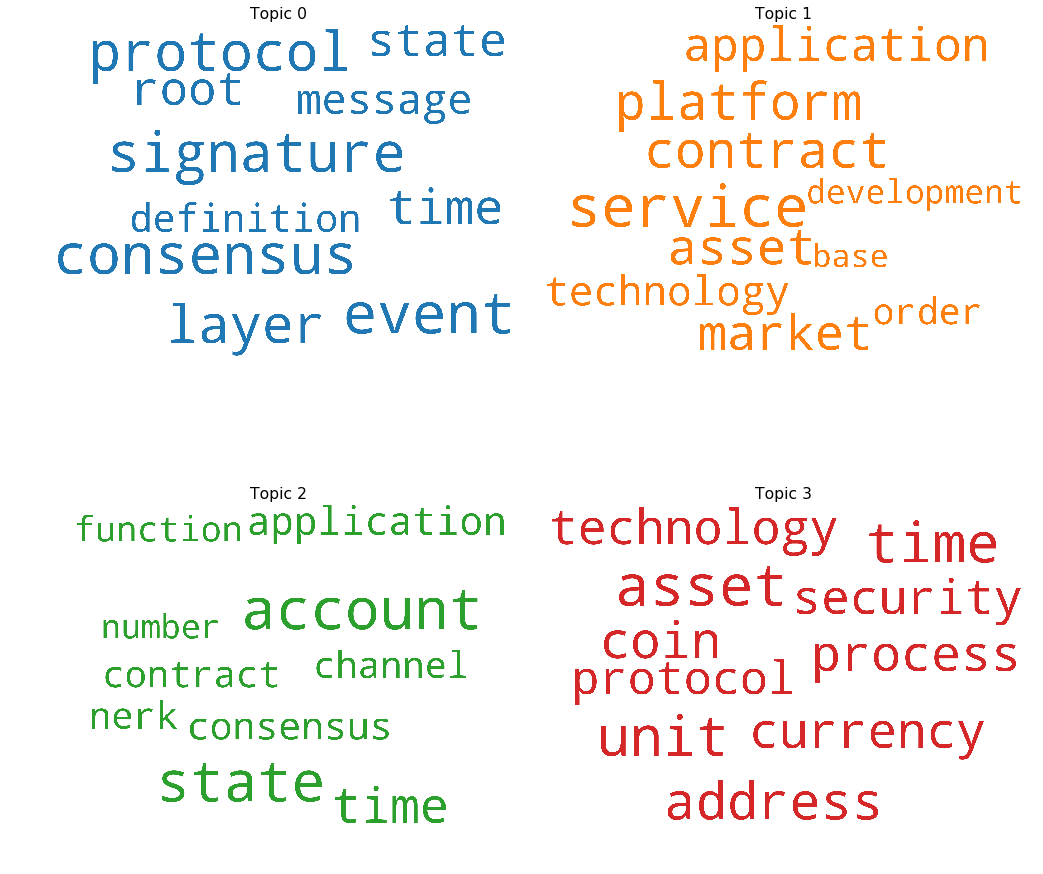

In [91]:
# 1. Wordcloud of Top N words in each topic
%matplotlib inline
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_2.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True, dpi = 70)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

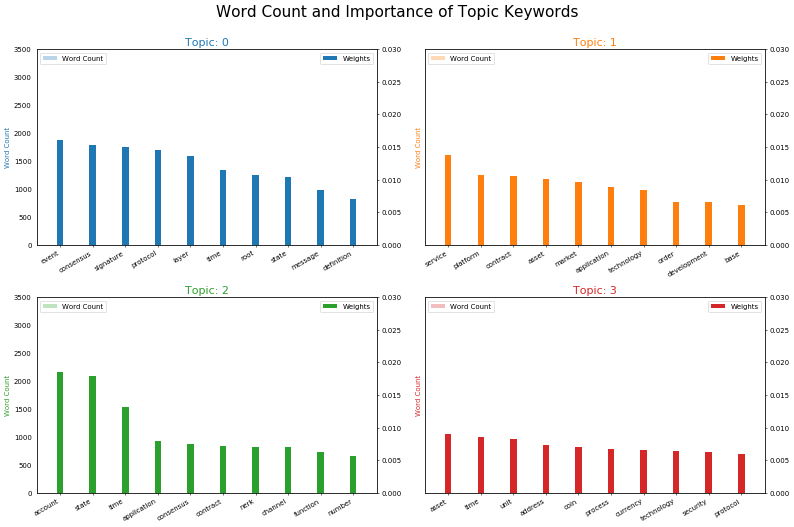

In [93]:
from collections import Counter
topics = lda_2.show_topics(formatted=False)
data_flat = [w for w_list in corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=50)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [101]:
#getting tppic distributions
topic_dist = lda_tfidf_2.state.get_lambda()

num_words = 5

topic_terms = [{w for (w, _) in lda_tfidf_2.show_topic(topic, topn=num_words)} for topic in range(topic_dist.shape[0])]
pprint(topic_terms)

[{'consensus', 'event', 'layer', 'signature', 'protocol'},
 {'market', 'contract', 'platform', 'service', 'asset'},
 {'application', 'consensus', 'state', 'time', 'account'},
 {'coin', 'unit', 'address', 'time', 'asset'},
 {'bit', 'note', 'hash', 'signature', 'input'}]


## 5 - Testing in unseen Document 

In [112]:
TEST_DIR = os.path.join(ROOT_DIR, "test-white-papers")
testset = pdf2text.get_dataset(path=TEST_DIR)

In [113]:
#corpora segregated in terms of sentences 
corpora_test = corpus.makeCleanCorpus(testset, lemmatize=True, removePunct=True, removeNums=True, makeSentences=True, removeURL=True, removeChar= True, stops=['\u200b'] )

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: adcoin
Cleaning: budbo
Cleaning: kwattcoin
Cleaning: oceanprotocol
Done!


In [116]:
#corpora segregated in terms of sentences 
corpora_test_whole = corpus.makeCleanCorpus(testset, lemmatize=True, removePunct=True, removeNums=True, makeSentences=True, removeURL=True, removeChar= True, stops=['\u200b'] )

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: adcoin
Cleaning: budbo
Cleaning: kwattcoin
Cleaning: oceanprotocol
Done!


In [122]:
#Combining them and putting into pandas dataframe
test_combined = {key:[combine_text(value)] for (key, value) in corpora_test.items()}
pd.set_option('max_colwidth', 150)
test_df = pd.DataFrame.from_dict(test_combined).transpose()
test_df.columns = ['whitepapers']
test_df = test_df.sort_index()
test_df.head()

,whitepapers
adcoin,version offer lot great opportunity technological advancement adopt blockchain literally internet dominant cryptocurrency lot problem internet p...
budbo,global cannabis comehensive solution cannabis indtry version web wwwio content forward statement security la...
kwattcoin,newwhitepaper disclaimer document document constitute prospectus sort solicitation investment coin represent ownership share public private corp...
oceanprotocol,decentralize substrate service technical foundation ltd version apr paper decentralize protocol nerk artificial intelligence dataservices aim sp...


In [123]:
#Creating a document-term matrix using CountVectorizer, and removing common english stop words. 

cv_test = CountVectorizer(stop_words ='english')
test_cv = cv_test.fit_transform(test_df.whitepapers)
test_dtm = pd.DataFrame(test_cv.toarray(), columns = cv_test.get_feature_names())
test_dtm.index = test_df.index
vocab = cv_test.get_feature_names()

In [128]:
test_tdm = test_dtm.transpose()
test_tdm.head()

,adcoin,budbo,kwattcoin,oceanprotocol
abide,0,1,1,0
ability,1,7,2,2
abort,0,0,0,3
aborted,0,0,0,1
abuse,0,2,0,0


In [129]:
sparse_docs_test = scipy.sparse.csr_matrix(test_tdm)
corpus_test = matutils.Sparse2Corpus(sparse_docs_test)
id2word_test = dict((v, k) for k, v in cv_test.vocabulary_.items())
id2word_test[10]

'accepted'

In [144]:
#lda with countvectorizer
lda_test = gensim.models.ldamodel.LdaModel(corpus=corpus_test,
                                           id2word=id2word_test,
                                           num_topics=5, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [145]:
get_lda_topics(lda_test, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,data,cannabis,coin,data,data
1,service,token,advertising,service,token
2,nerk,business,energy,nerk,service
3,reward,platform,payment,reward,nerk
4,access,global,mining,market,cannabis
5,token,industry,blockchain,token,business
6,stake,user,online,access,blockchain
7,compute,web,market,publisher,reward
8,publisher,wwwio,transaction,include,web
9,figure,blockchain,version,cannabis,access


### References:

https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/ 

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

https://github.com/susanli2016/NLP-with-Python/blob/master/LDA_news_headlines.ipynb

https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d

https://medium.com/@tomar.ankur287/topic-modeling-using-lda-and-gibbs-sampling-explained-49d49b3d1045

https://www.kdnuggets.com/2018/08/topic-modeling-lsa-plsa-lda-lda2vec.html

